# Notebook clean df2


https://data.world/wikimedia/monthly-wikimedia-editor-activity  

Download : 12/12/2023

This dataset contains the monthly activity of all the wikipedia users from 2001 to 2015. We’ll use it to measure the influence of the activity on vote results, while distinguishing recent activity and overall activity before the request for adminship.

In [100]:
%reload_ext autoreload
%autoreload 2
from P3_helpers import *

## Import Datasets

In [4]:
df = pd.read_csv('prep_df_v2.csv')
df.head()

,wiki,month,user_name,revisions,year
0,aawiki,2004-04,Angela,2.0,2004
1,aawiki,2004-06,Tim Starling,10.0,2004
2,aawiki,2004-08,Tim Starling,2.0,2004
3,aawiki,2004-09,Davidcannon,2.0,2004
4,aawiki,2004-12,Tim Starling,12.0,2004


In [5]:
df2 = get_dataframe()
df2.head()

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."


In [6]:
df_timeserie = get_timeserie_df(df2)
df_timeserie.head()

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.000000,1
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.850000,6
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.,1,0.500000,2
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,0.966667,3
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,1.716667,4


## Target

We are first exploring how the number of edits or revisions contributes to whether or not an administration request gets approved. We want to see how important it is in the decision-making process.

In [7]:
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M')

### Average revision's number 12 month before and after the last election


To address this goal, we first examine the average number of edits made by users who were accepted or rejected during their latest administration request. We first process the dataframe as we need and then compute the mean of revision and the interval confidence.

In [102]:
process_df = process_elections(df2)

In [103]:
df_target_rev = generate_user_revision_dataset(df, process_df)

In [104]:
result_stats = revision_stat(df_target_rev)

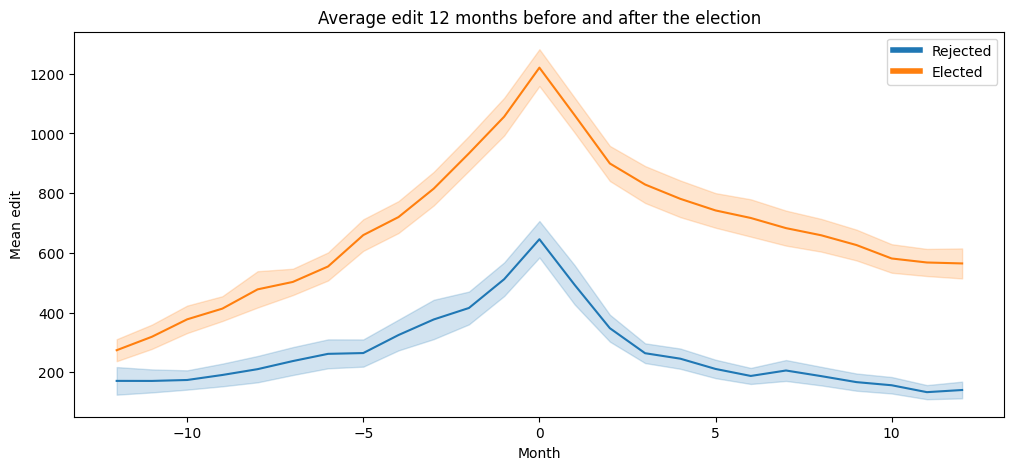

In [107]:
ax = plot_average_edit(result_stats, 'Month', mean_col='center')
ax.set_title('Average edit 12 months before and after the election')
plt.show()

Overall, we can observe that users who made a higher number of revisions before their request were significantly more likely to be accepted than others.

### Average revision's number 12 month before and after all the different election

As there might be multiple rounds of elections for the same user, we then investigate whether the same pattern holds when considering all elections. There might be multiple rounds of elections for the same user.

In [108]:
process_df_ts = process_elections_ts(df_timeserie)

In [109]:
df_target_rev_ts = generate_user_revision_dataset(df, process_df_ts)

In [110]:
result_stats_ts = revision_stat(df_target_rev_ts)

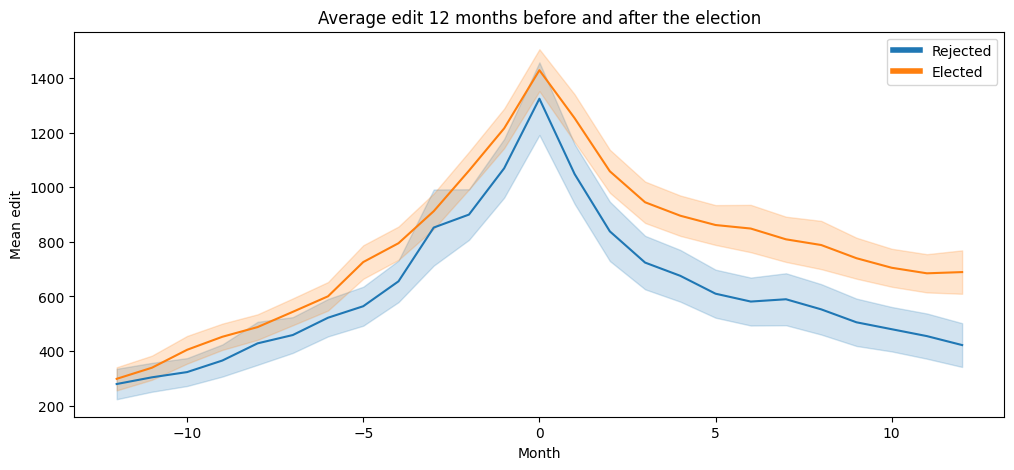

In [112]:
ax2 = plot_average_edit(result_stats_ts, 'Month', mean_col='center')
ax2.set_title('Average edit 12 months before and after the election')
plt.show()

There is less difference in this case but as some election are just a few days apart, some value are duplicated for rejected so it still significant.
It suggests that the number of revisions made by users before their request for adminship is a significant factor in the acceptance or rejection decision.

### Causal Analysis between the different election of a given user

We then use causal analysis to directly examine the impact that the number of revisions has on the outcome of an election.

Garder seulement le plus pertinent (changer la fonction si c'est pas 1 mois) J'ai aucune idée de comment interpréter les résultats pour ça..

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
causal_process = process_df_ts.drop_duplicates(subset=['Target','Round'])

In [ ]:
test = create_df_causal(causal_process, df)
test.head()

,Target,revisions,Result
0,(aeropagitica),1473.0,1.0
1,07bargem,7.0,-1.0
2,1234r00t,0.0,-1.0
3,21655,1833.0,-1.0
4,21655,1833.0,-1.0


In [ ]:
# 1 mois
print(smf.ols('revisions ~ Result', data=test).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              revisions   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     151.0
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.47e-34
Time:                        07:24:36   Log-Likelihood:                -40240.
No. Observations:                4728   AIC:                         8.048e+04
Df Residuals:                    4726   BIC:                         8.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    791.9960     17.580     45.051      0.0

In [ ]:
# 1 mois
print(smf.ols('Result ~ revisions', data=test).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     151.0
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.47e-34
Time:                        07:23:53   Log-Likelihood:                -6610.5
No. Observations:                4728   AIC:                         1.323e+04
Df Residuals:                    4726   BIC:                         1.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2107      0.017    -12.507      0.0

In [ ]:
# 2 mois
print(smf.ols('Result ~ revisions', data=test).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     186.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.25e-41
Time:                        07:09:09   Log-Likelihood:                -6593.5
No. Observations:                4728   AIC:                         1.319e+04
Df Residuals:                    4726   BIC:                         1.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2280      0.017    -13.408      0.0

In [ ]:
# 6 mois

model = smf.ols('Result ~ revisions', data=test).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     207.1
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           5.53e-46
Time:                        06:57:29   Log-Likelihood:                -6583.5
No. Observations:                4728   AIC:                         1.317e+04
Df Residuals:                    4726   BIC:                         1.318e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2313      0.017    -13.734      0.0

## Source

Then, we wanted to determine if individuals making the most revisions were also among the first to vote, to assess whether they might have a greater influence than others. Therefore, we plotted the total number of users against the average voting time of these users.

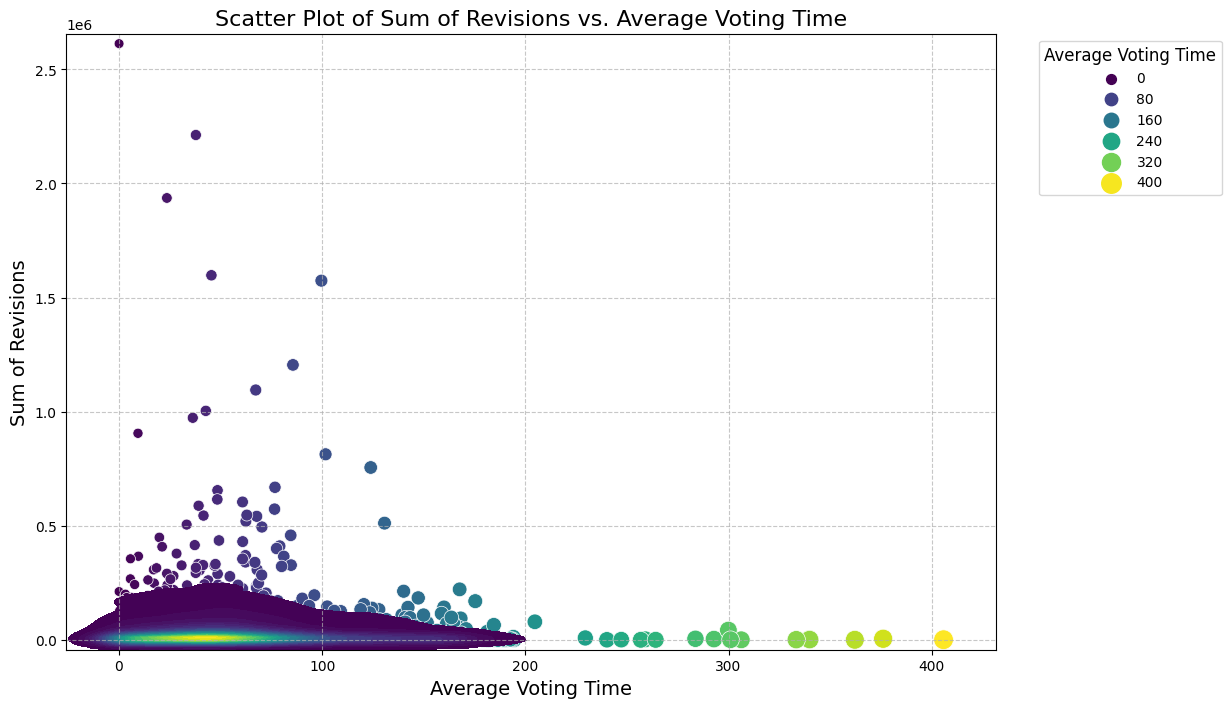

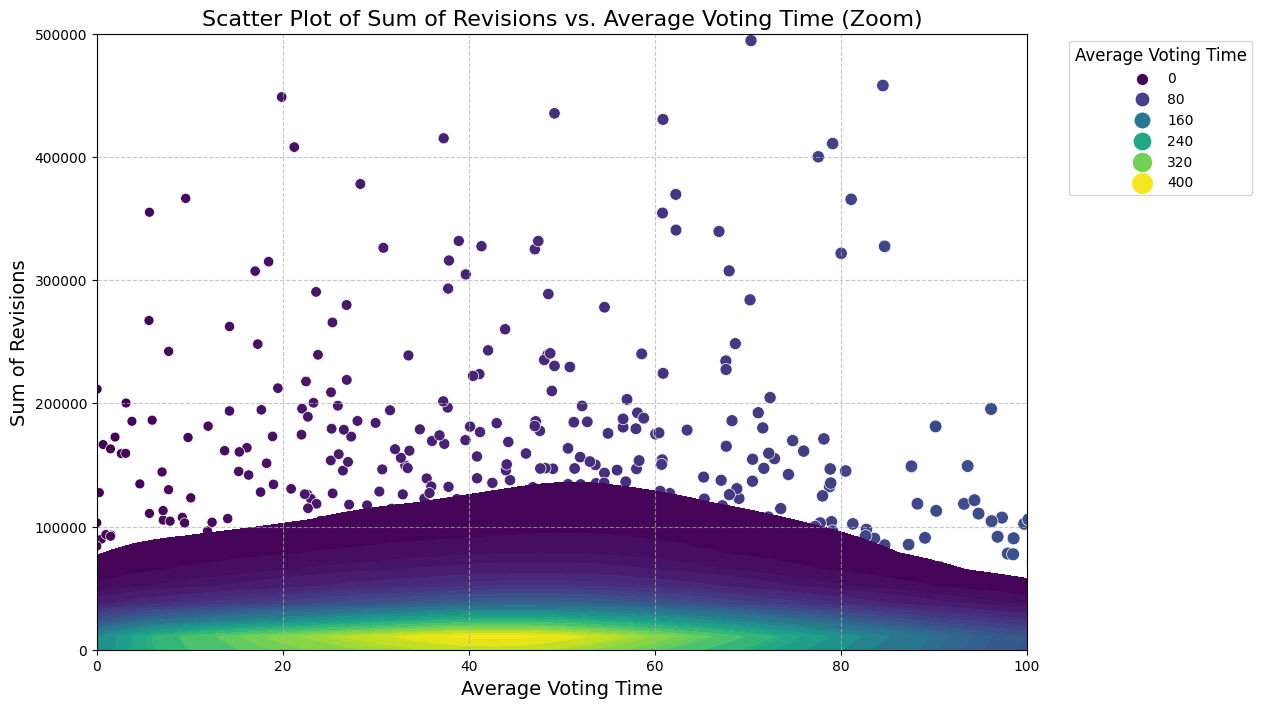

In [154]:
plot_edit_voting_time(df, df_timeserie)

We observe that the majority of points concentrate in the same area, representing few edits for a relatively low voting time. As expected, for higher voting times, the number of edits tends to be lower. However, some users among the earliest voters have a remarkably high number of revisions. To confirm this result, we then examine the number of revisions versus the number of participations in votes.

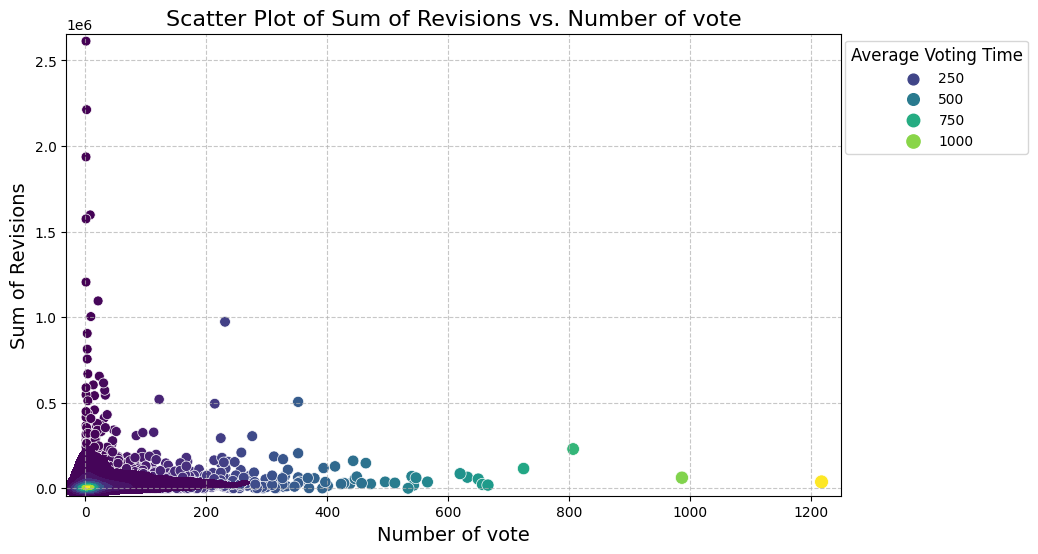

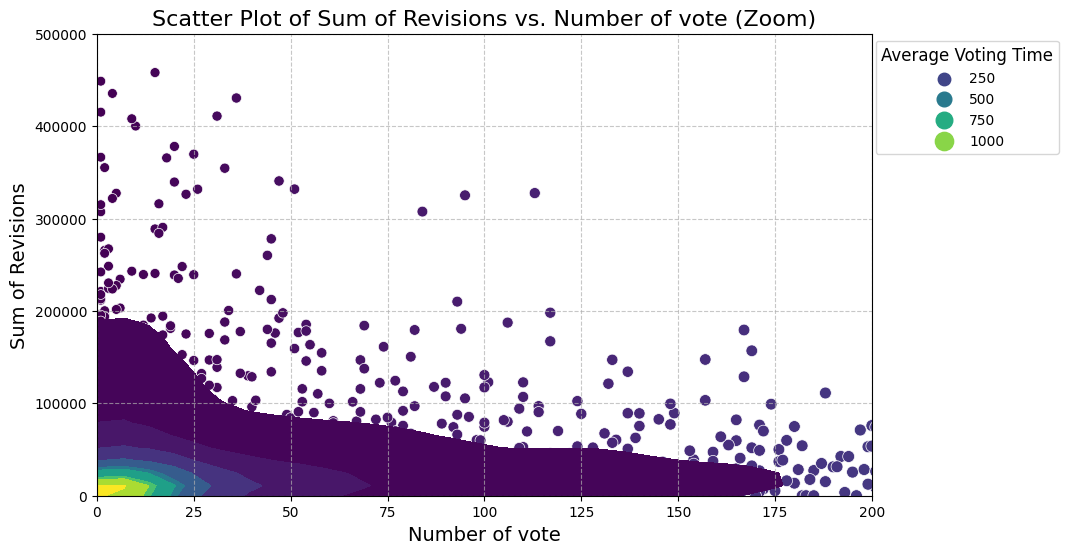

In [168]:
plot_edit_nb_vote(df, df_timeserie)

In this graph, we can see that these points are not significant since the user has participated only once in an election. Therefore, we cannot draw conclusions about the influence of individuals making many revisions through these graphs.

## Community

In [169]:
df_dict = load_datasets_com(df)

File df_community_2010.csv not found. Skipping.


### Distribution of revisions by community

Finally, thanks to the previously conducted community analysis, we were able to explore another component of influence, which is the group effect. Initially, we examined whether certain communities tended to make more revisions than others.

In [ ]:
agg_data_dict = compute_stats_community(df_dict)


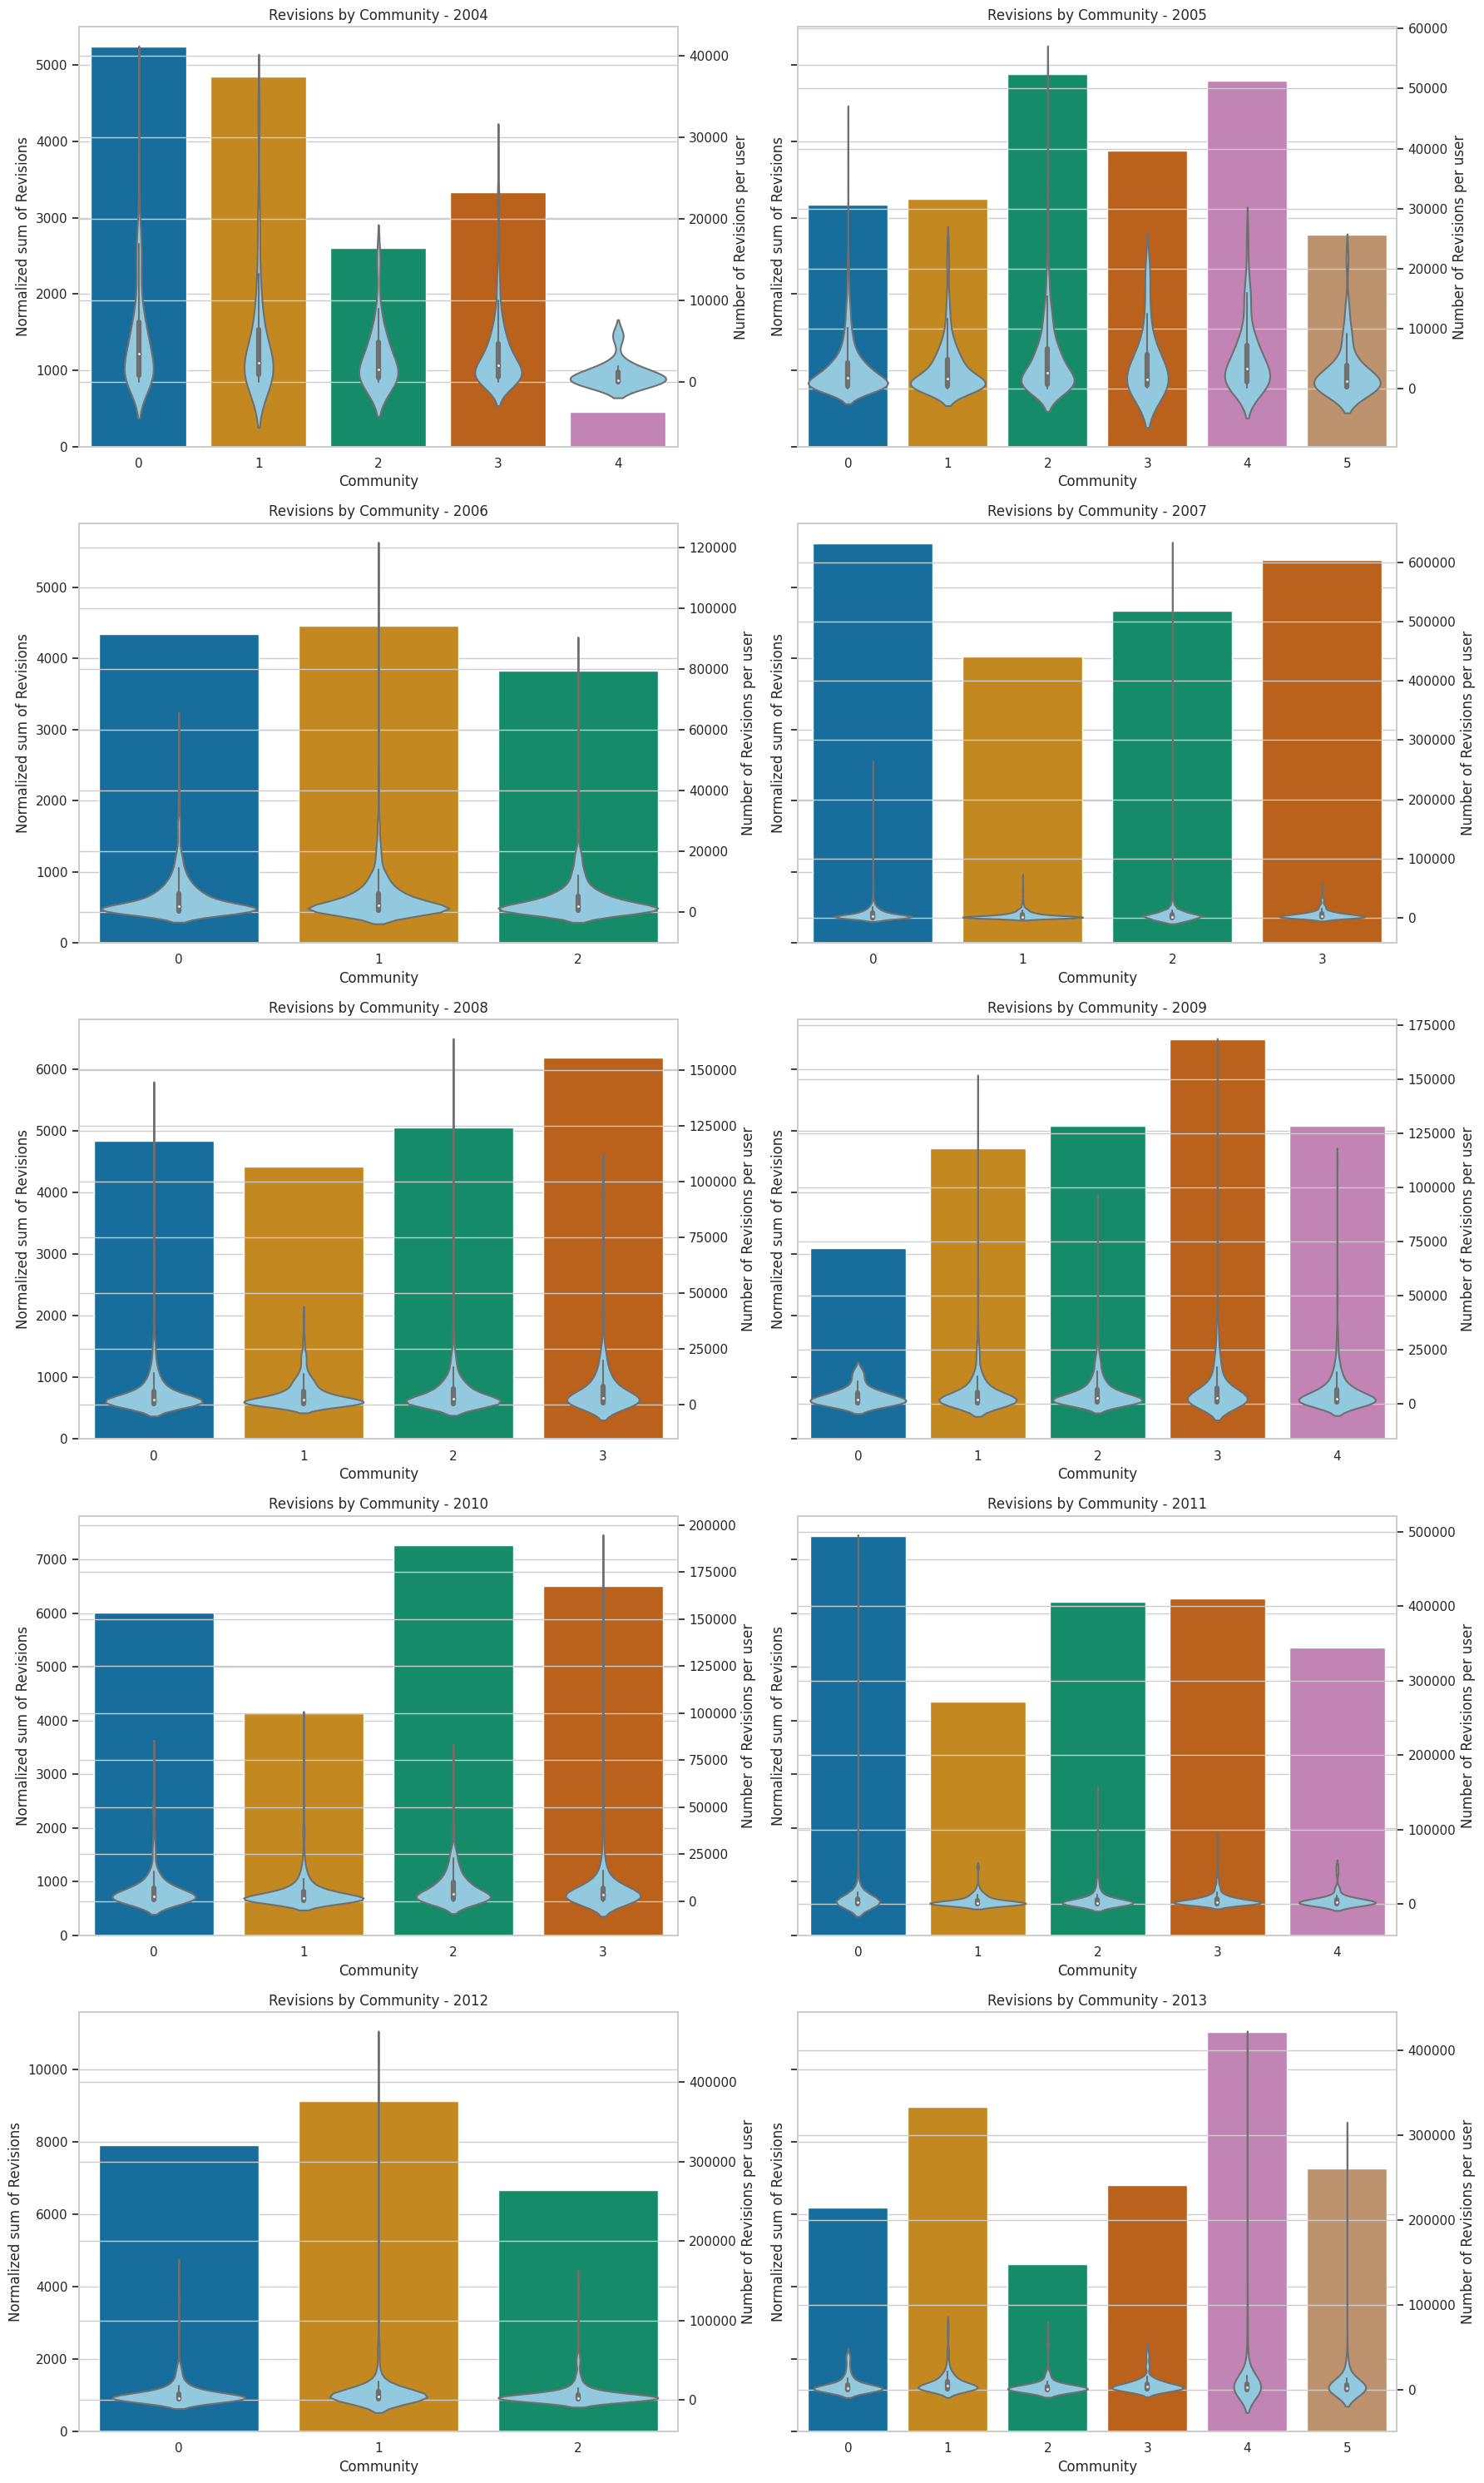

In [ ]:
plot_com_graph(agg_data_dict, df_dict)

This initial analysis proved to be inconclusive. Indeed, except for 2004 with community 4, all communities are equally involved, with each having between 3000 and 5000 revisions per user per year.

### Distribution of revisions of the top 10 active source of each community

We then wondered if, within communities, certain users could be more influential based on their number of votes and voting time. We observed in the graphs below that some users made many more page revisions than others (more than 150,000 for some compared to a few thousand for others, and this is only for the top 10 users in terms of revisions in the community). However, when looking at their voting time, we do not notice any significant differences compared to other users. Therefore, once again, when examining the influence of a user on others, we do not observe any distinct patterns.

In [ ]:
top_users_dict = compute_top_k(df_dict, 10)

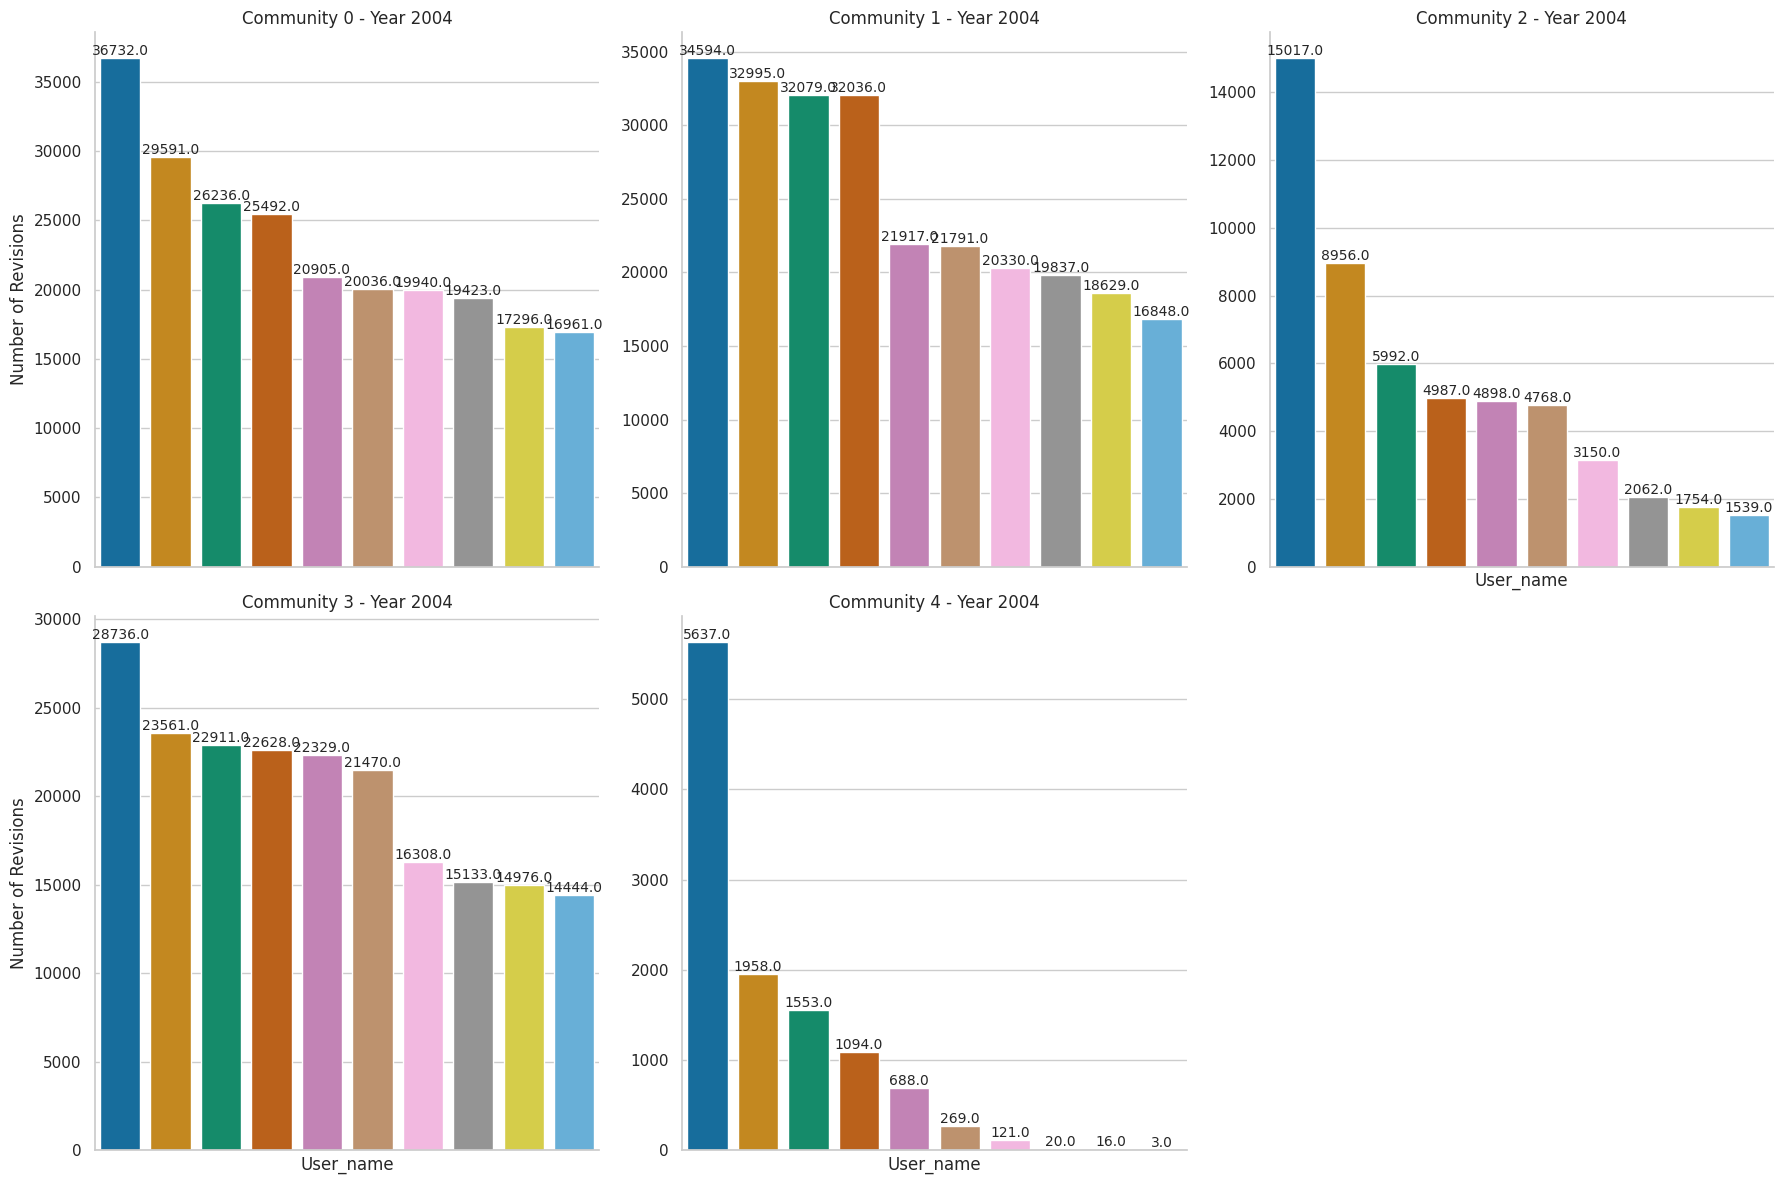

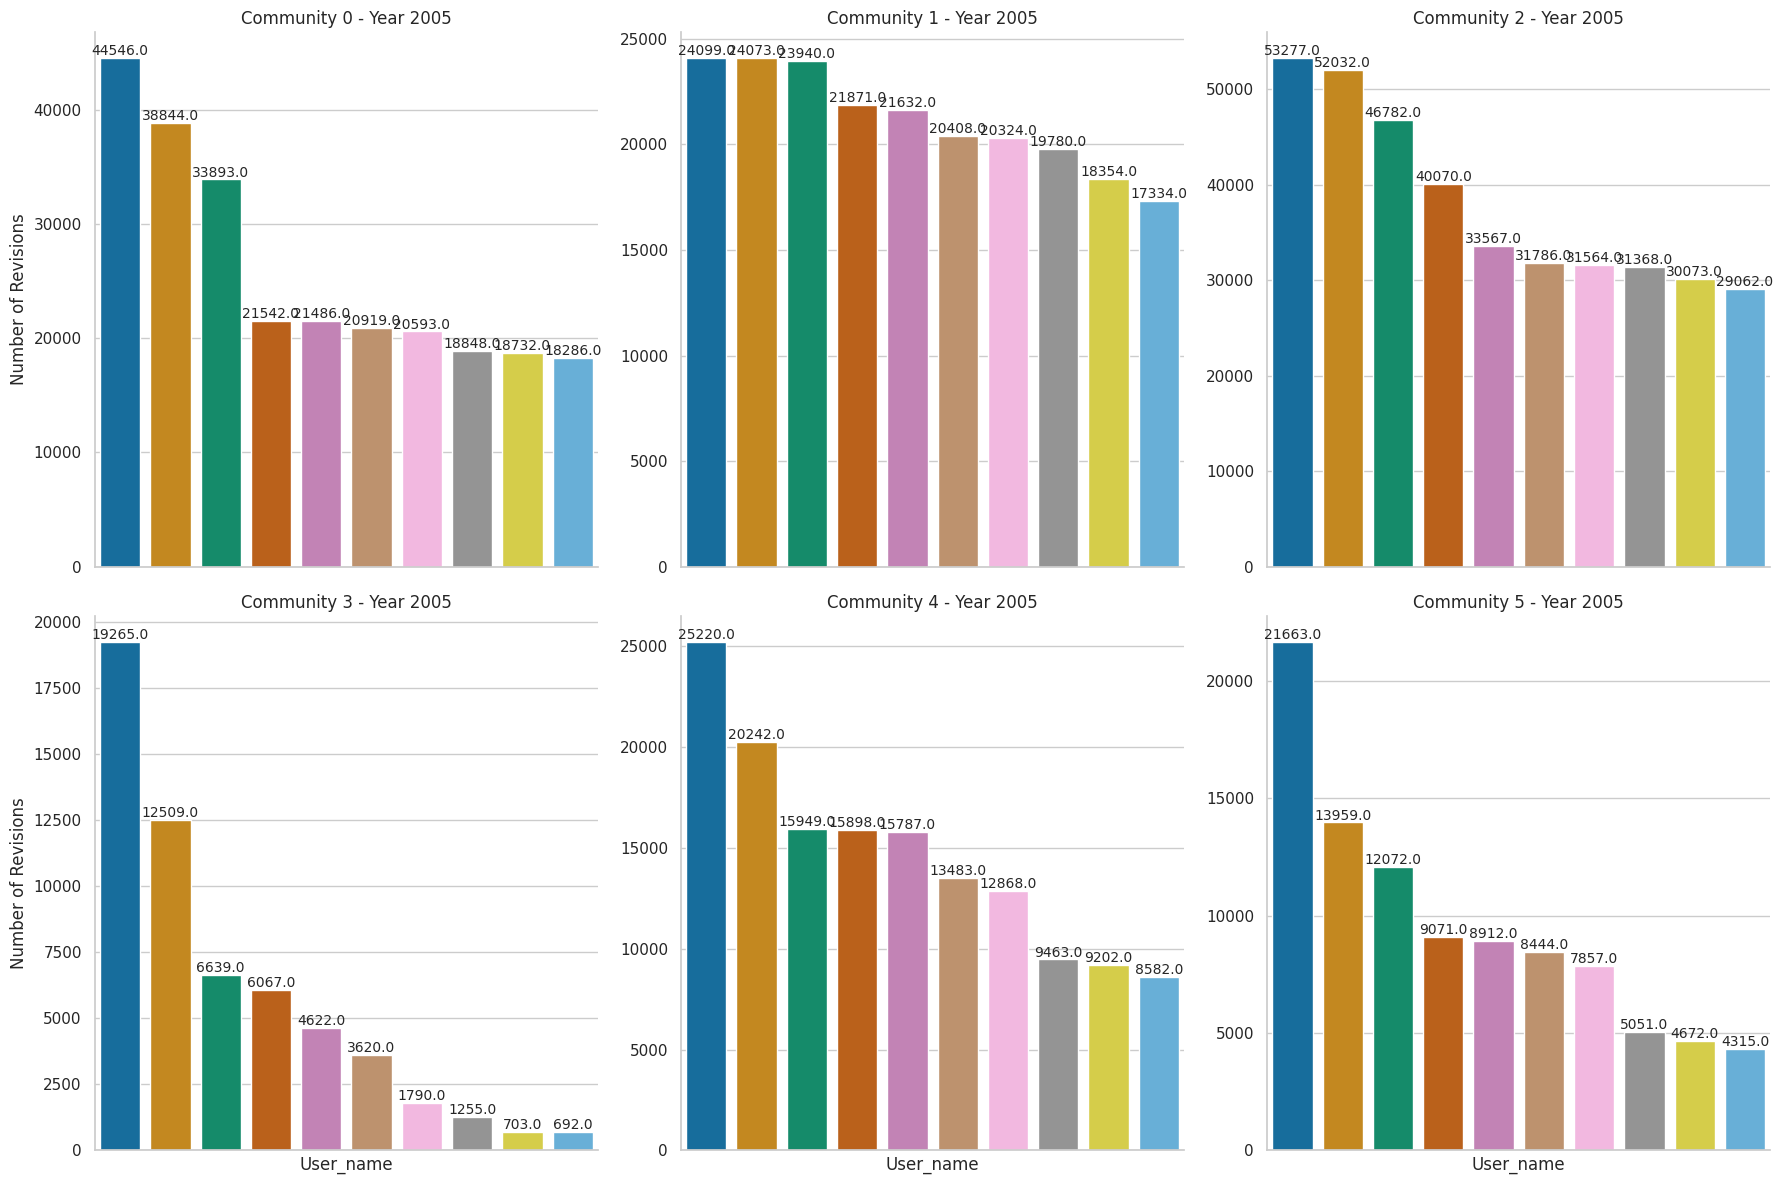

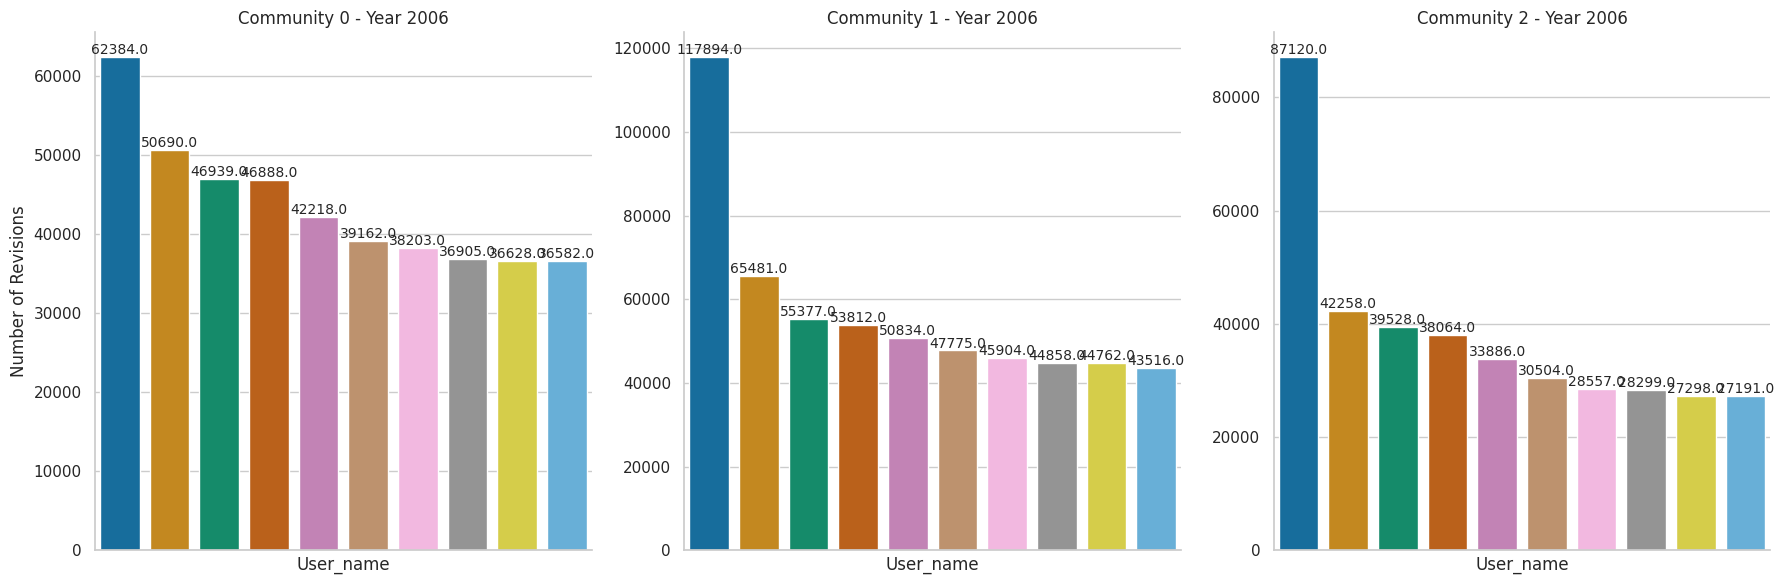

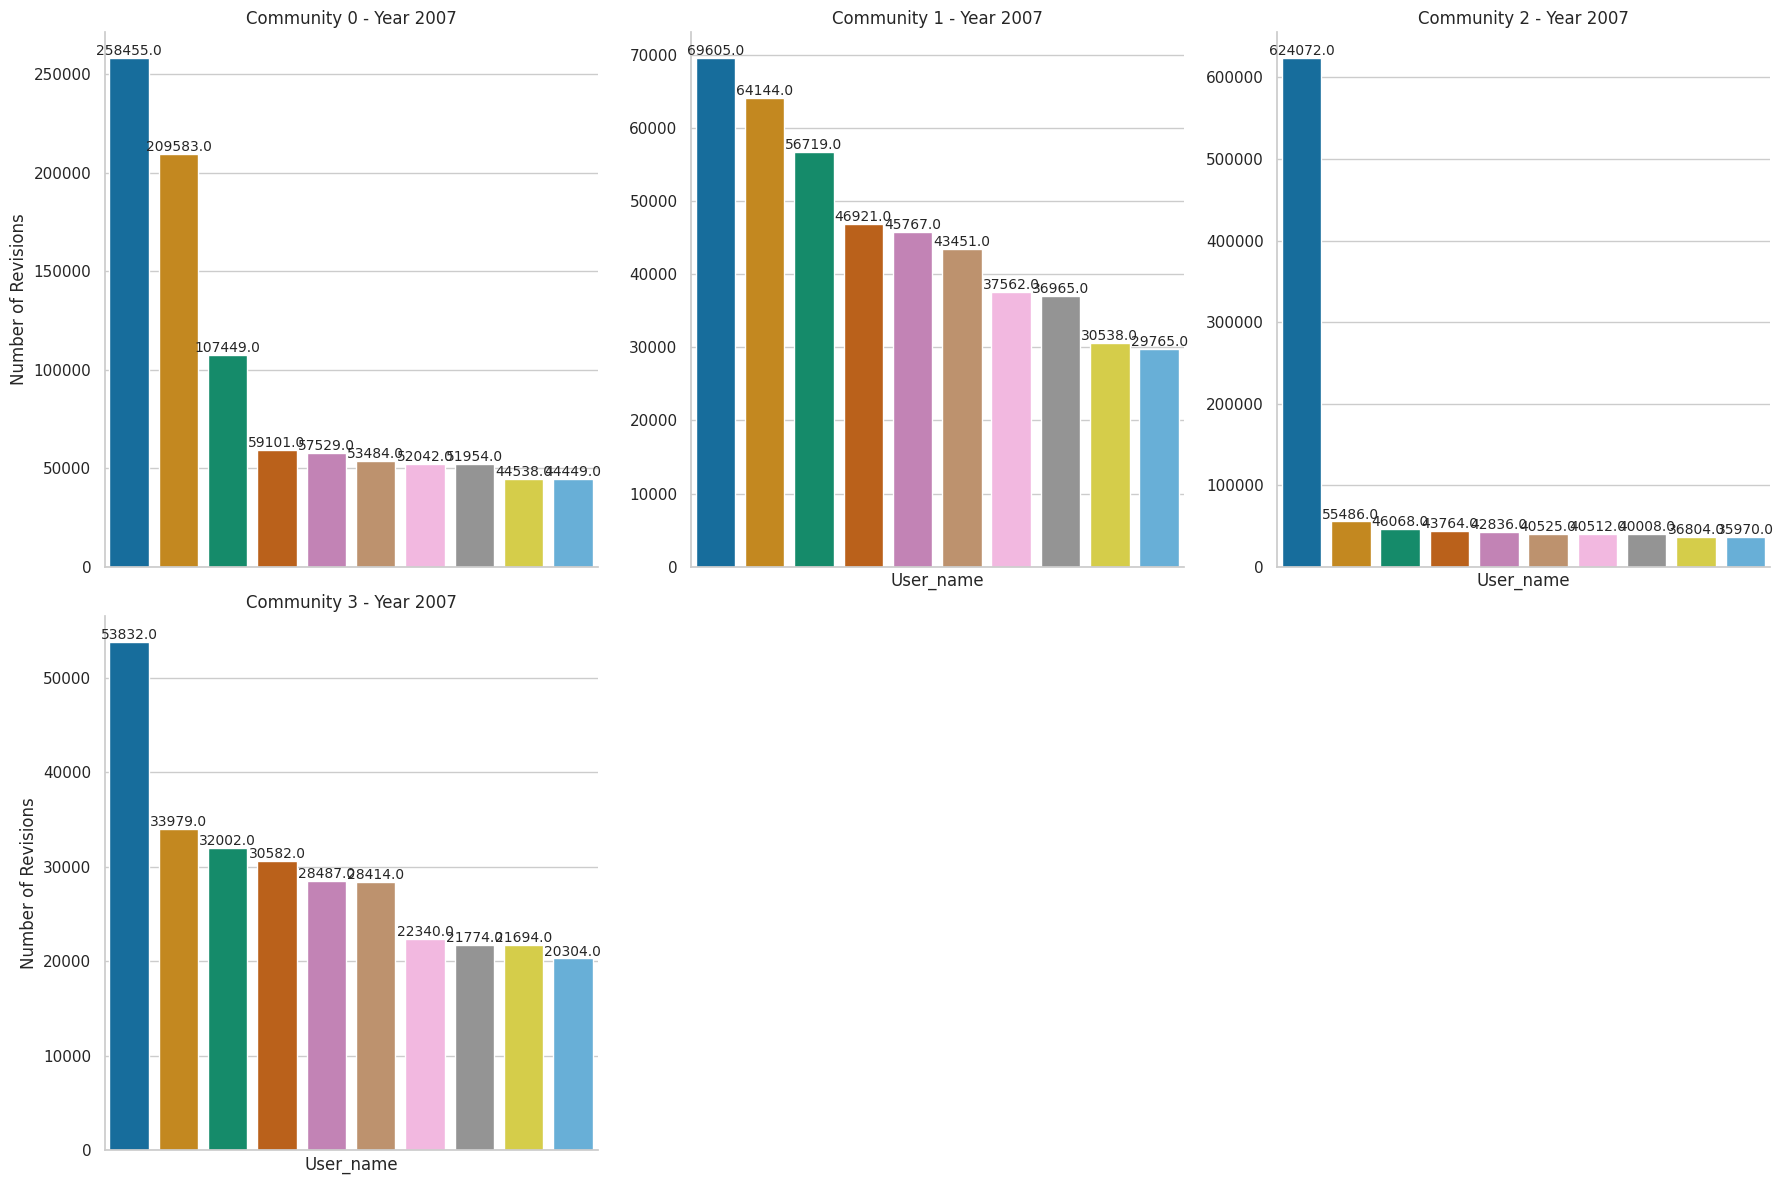

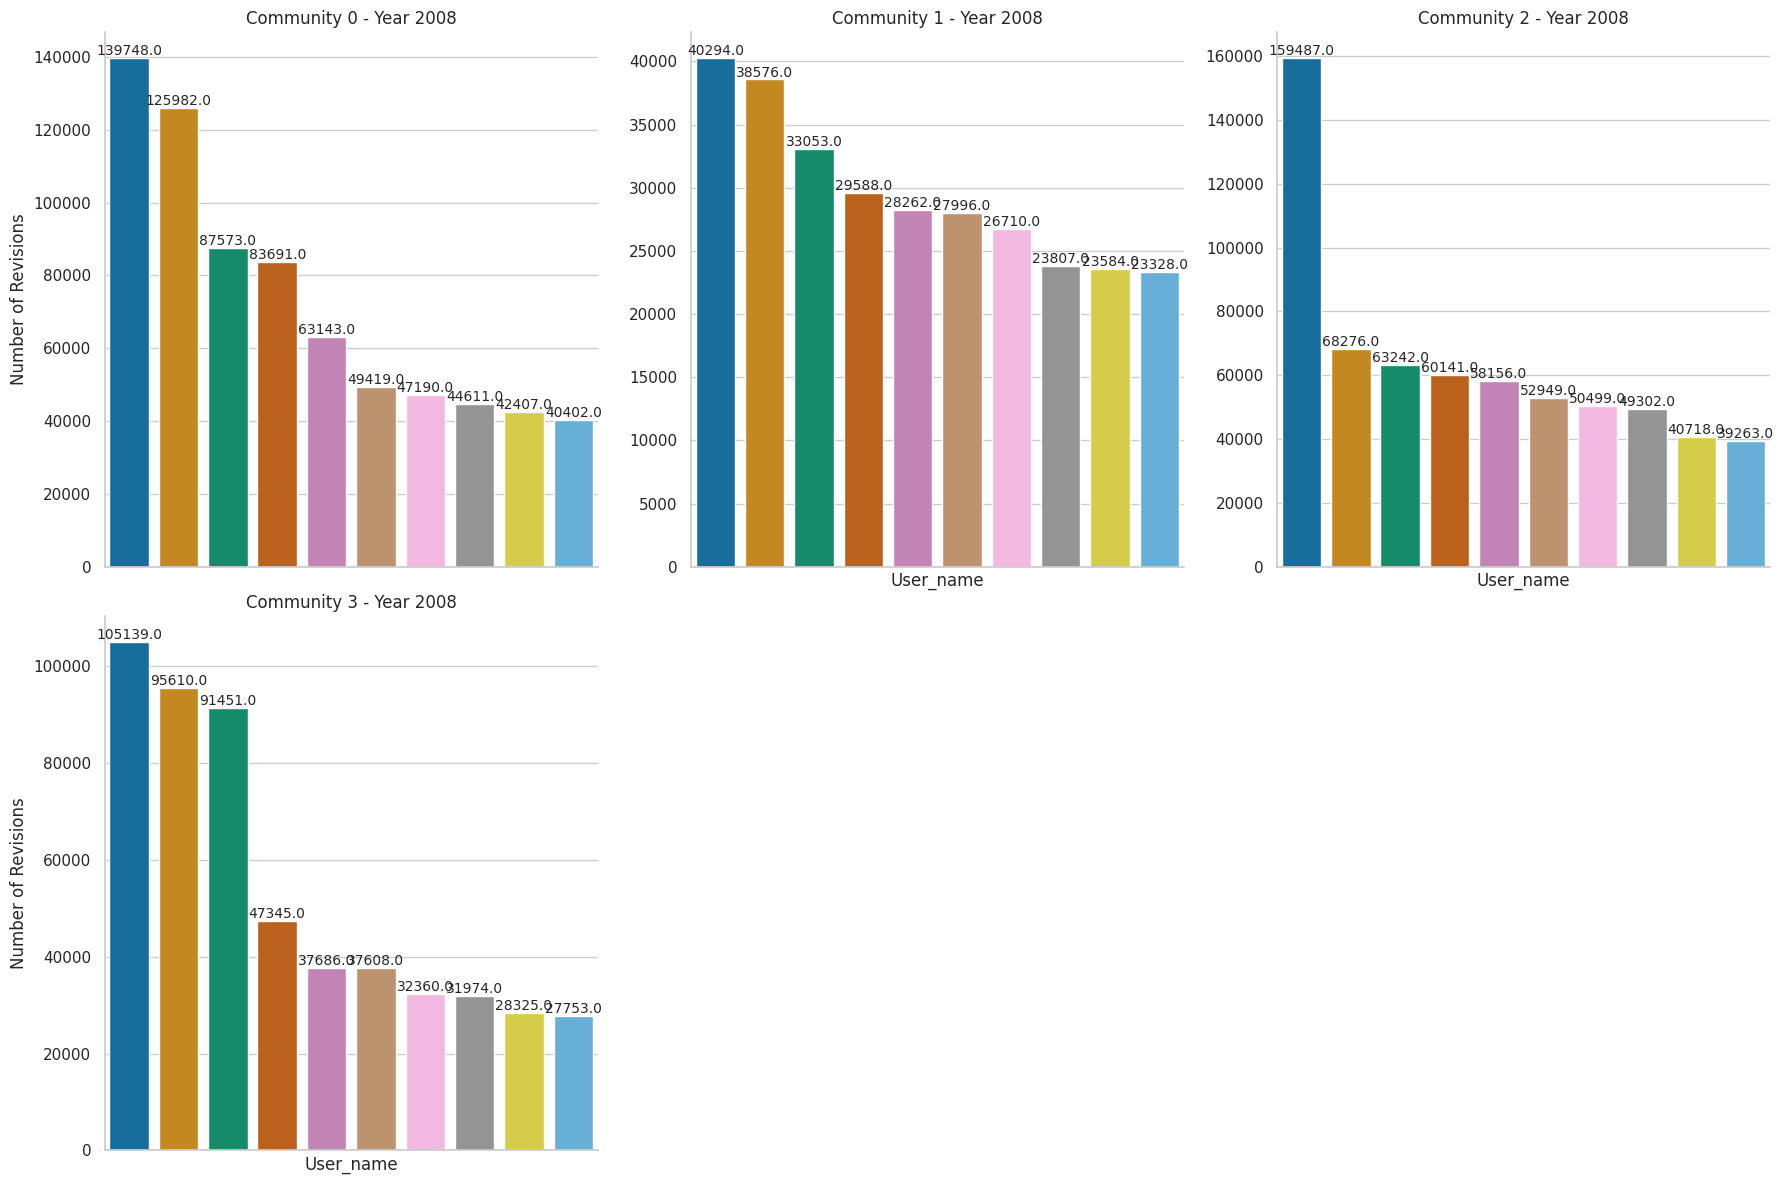

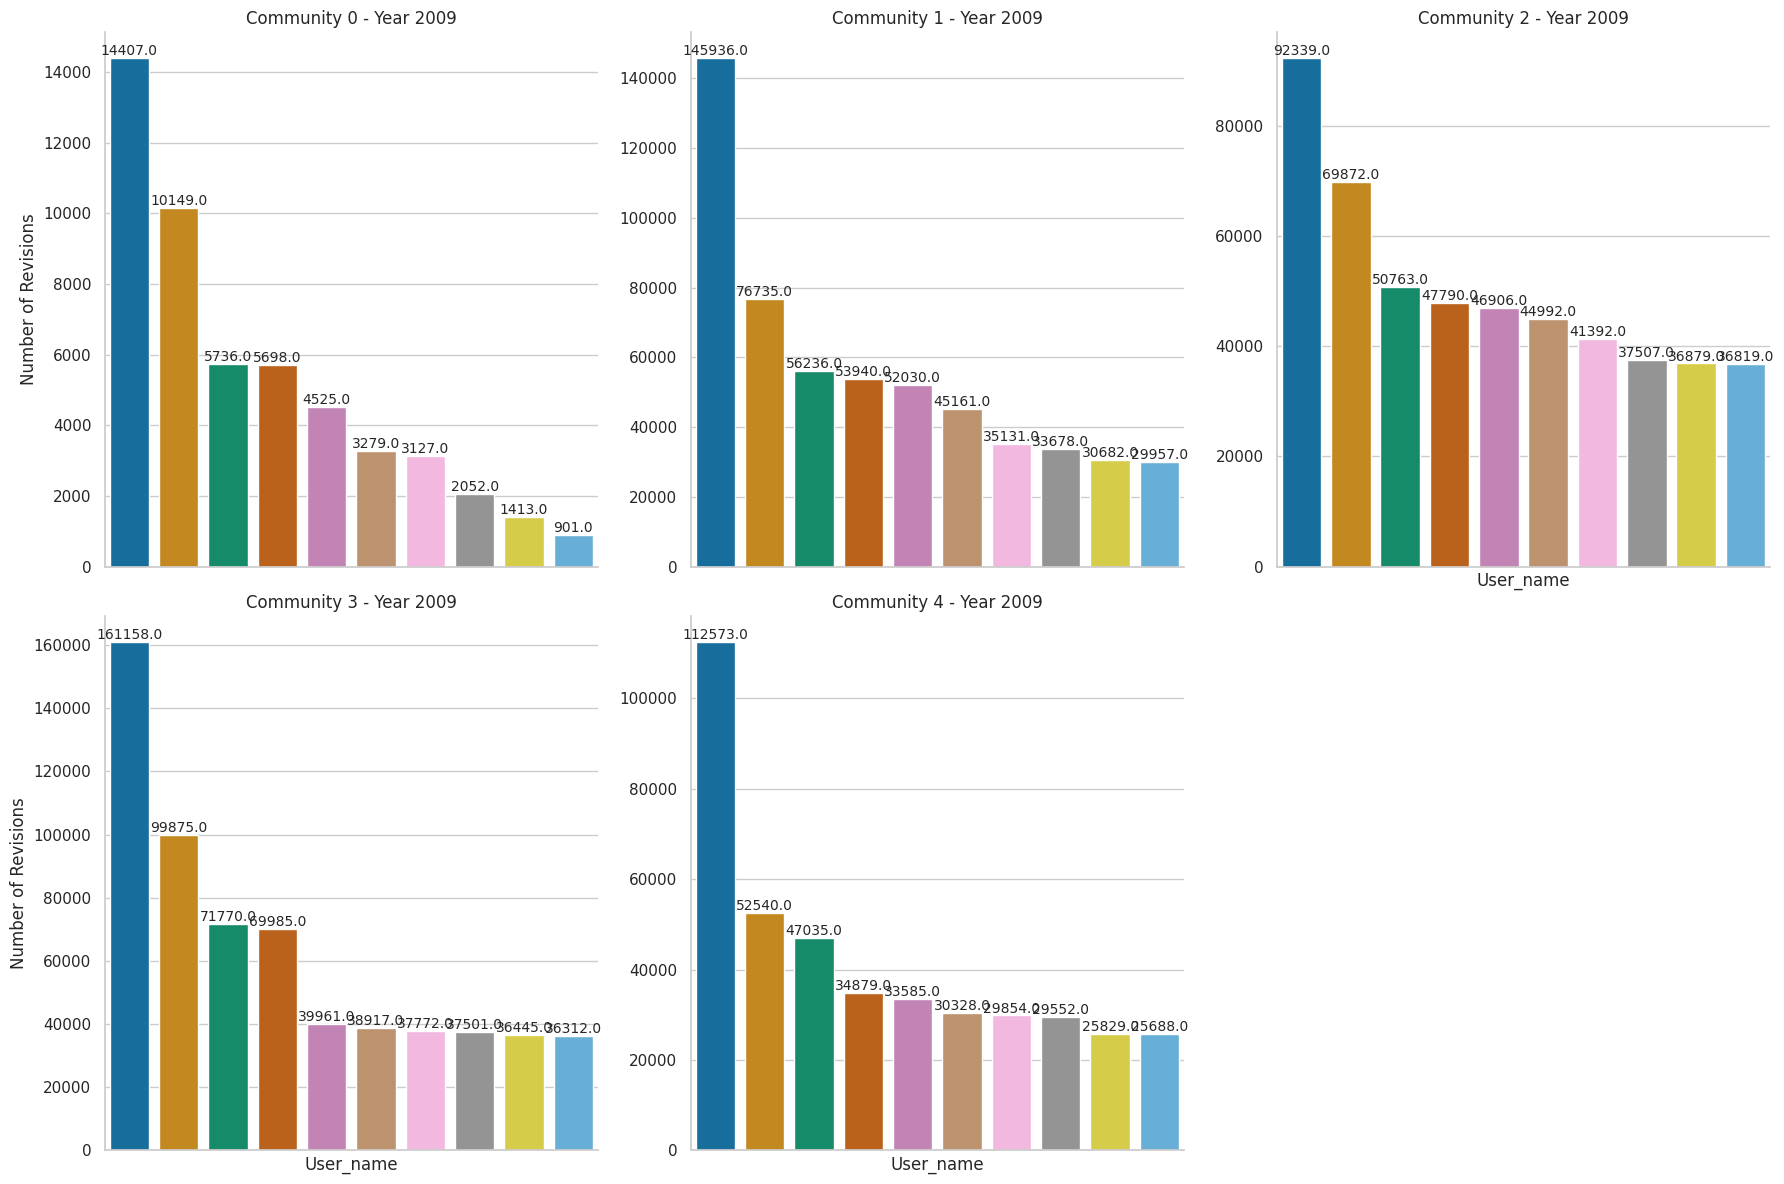

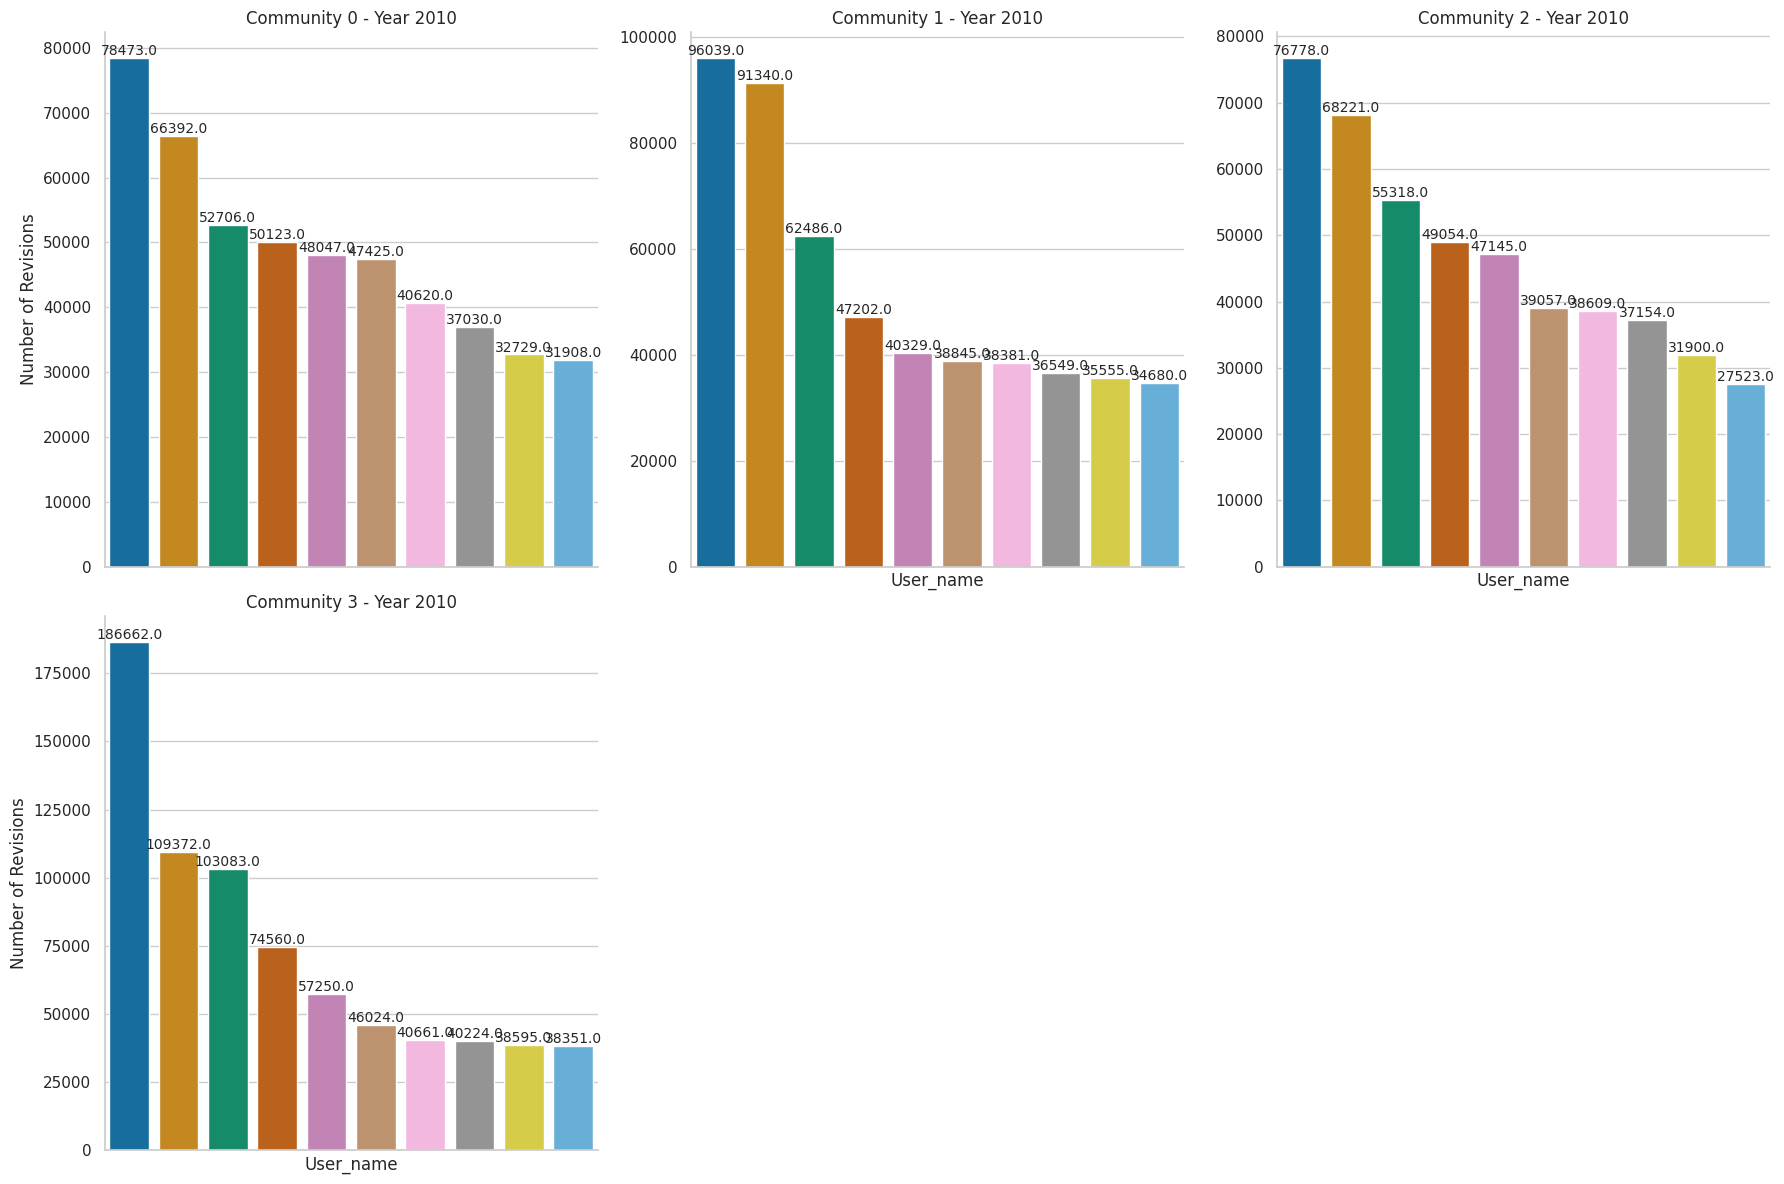

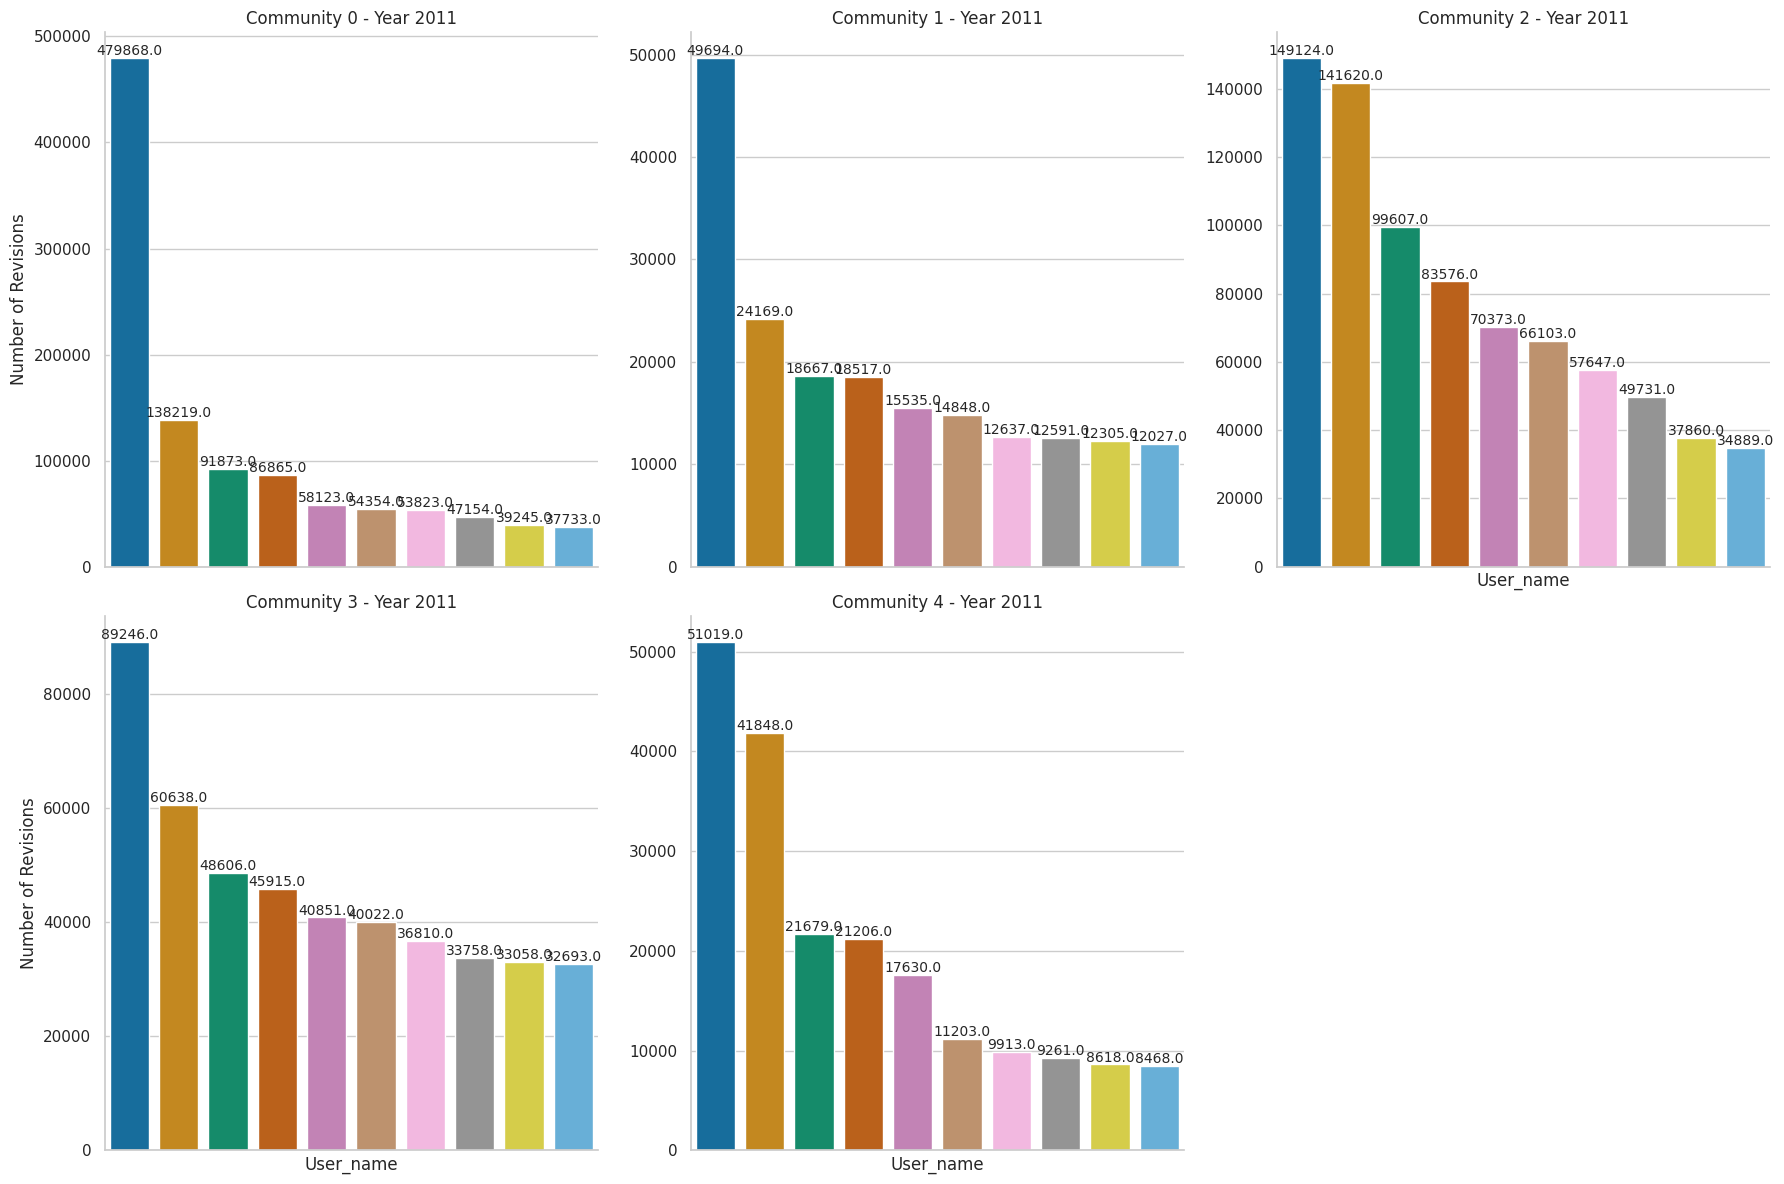

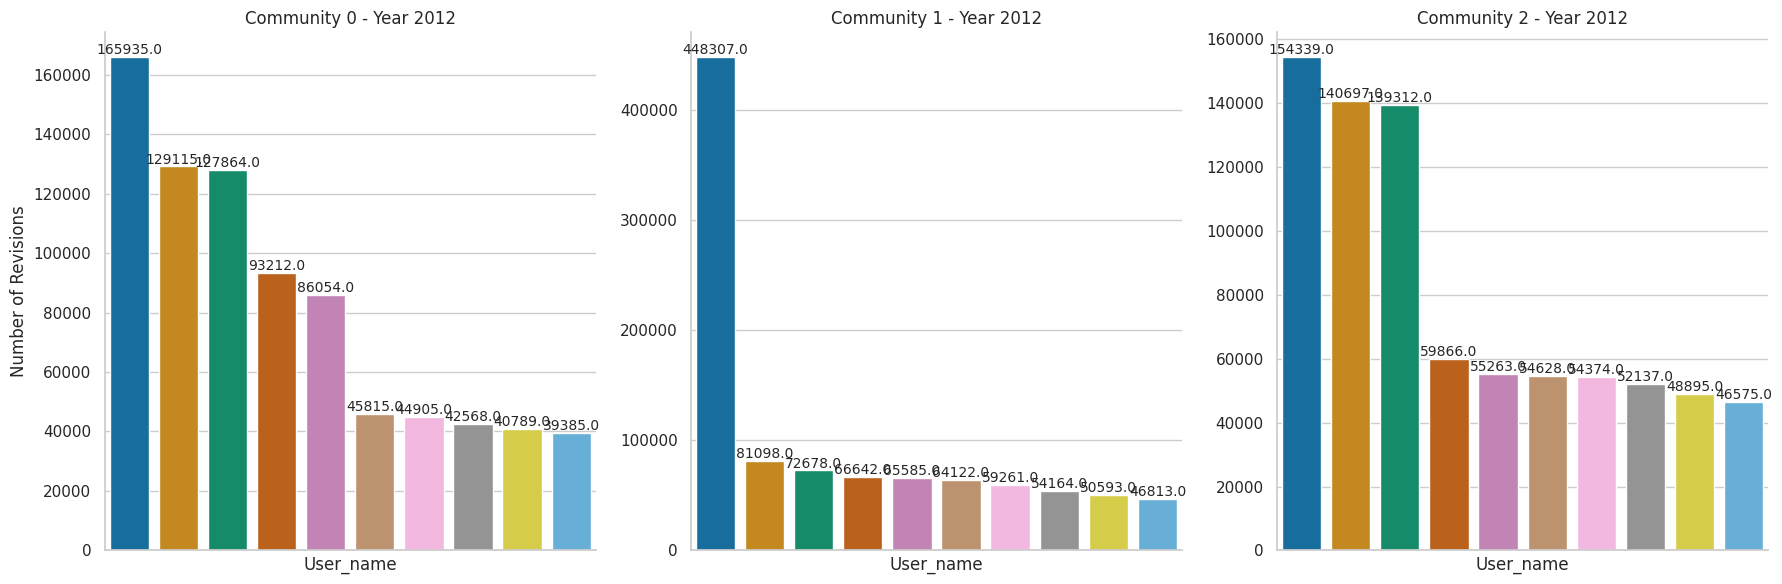

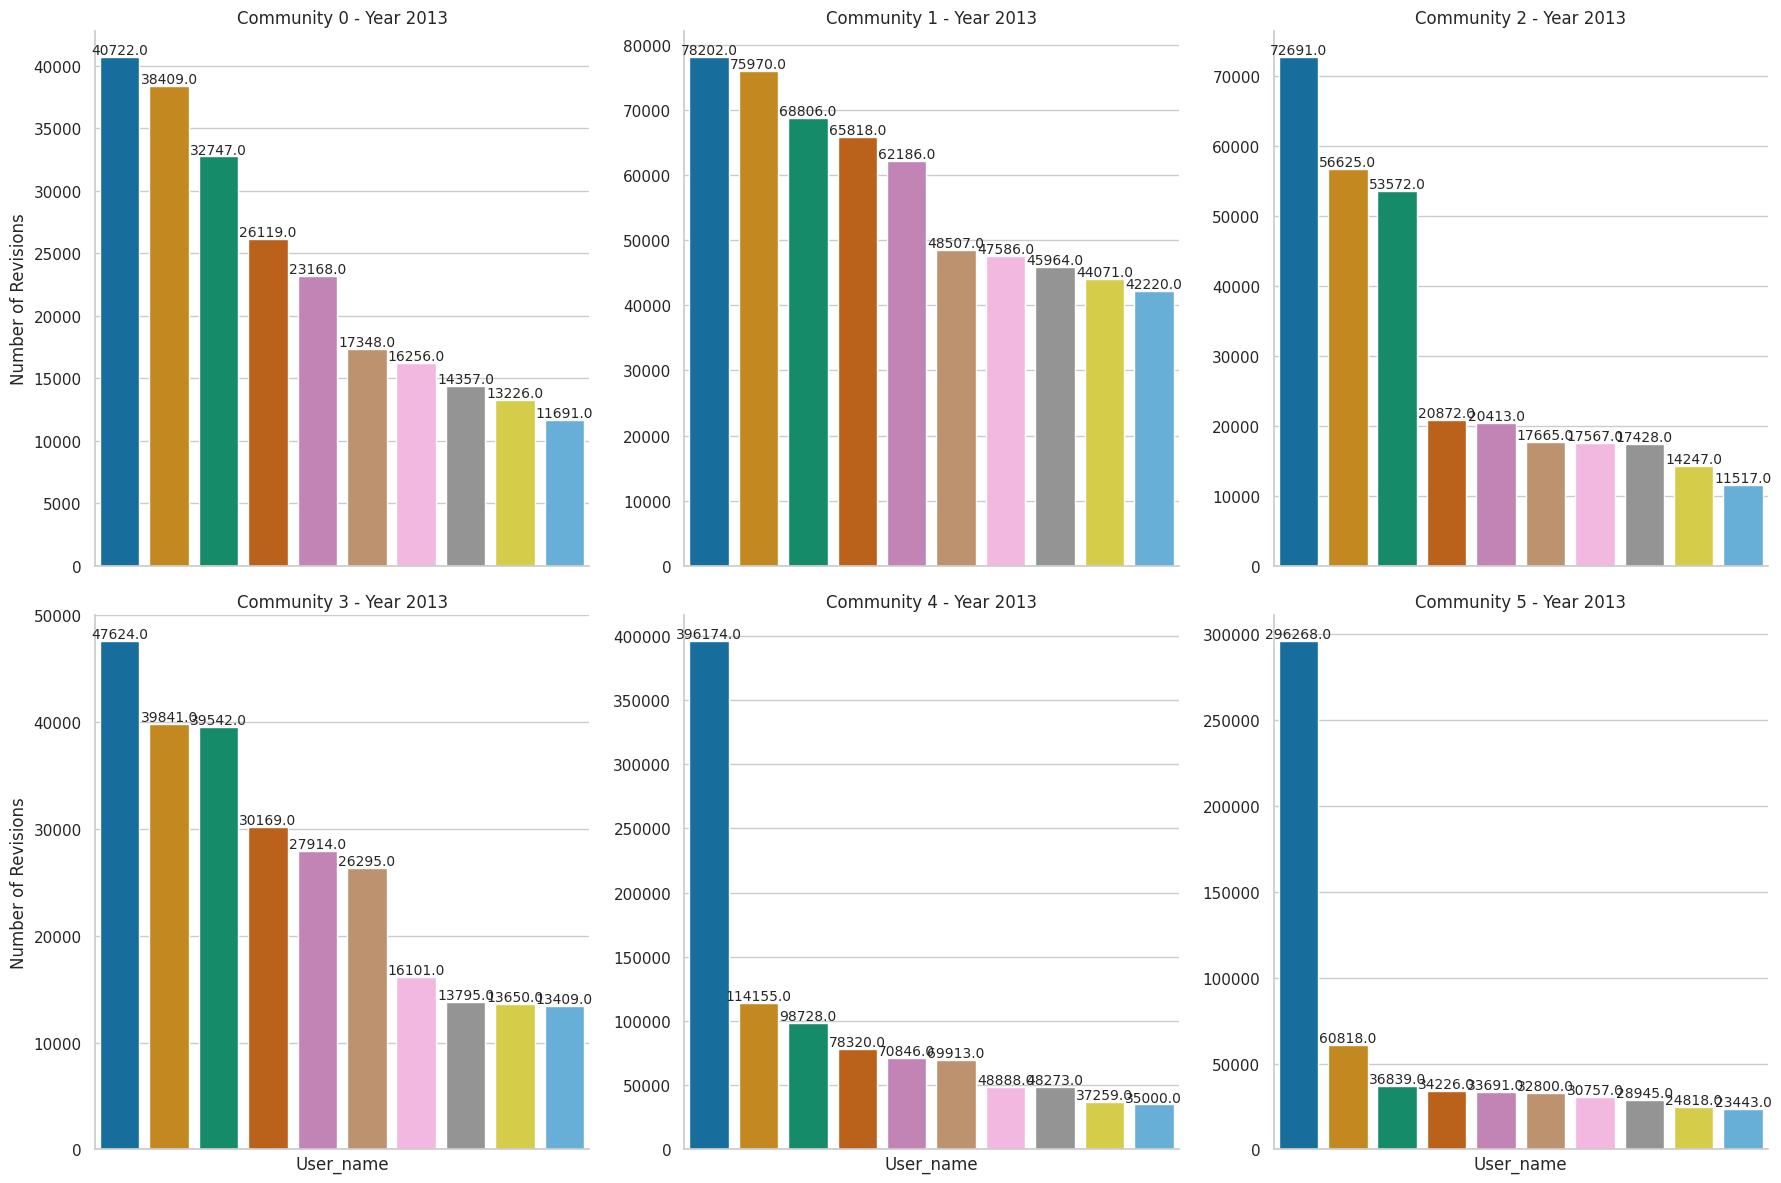

In [ ]:
plot_top_k(top_users_dict, df_dict)

### Average voting time of the top 10 active source of each community

In [ ]:
stats = compute_stat(df_timeserie, top_users_dict)
stats

,Year,Community,Source,Voting_time,Vote_number,revisions
0,2004.0,0,Seth Ilys,56.54,10.00,36732.0
1,2004.0,0,Angela,20.07,6.00,29591.0
2,2004.0,0,Charles Matthews,33.95,9.40,25492.0
3,2004.0,0,Timwi,0.00,1.00,20905.0
4,2004.0,0,Maximus Rex,33.84,6.68,20036.0
...,...,...,...,...,...,...
430,2013.0,5,Sitush,97.24,97.50,32800.0
431,2013.0,5,Titodutta,64.34,76.17,30757.0
432,2013.0,5,Crisco 1492,33.76,72.67,28945.0
433,2013.0,5,Andrewman327,31.18,45.00,24818.0


### Study Case : 2005 - Community 3

Finally, we noticed by analyzing the communities that some communities tended to cast more negative votes than others, and the elections associated with these communities resulted in rejection. We then examined these cases in more detail to determine whether the negative votes were justified or not based on the user's revisions.

For the community 3 in 2005, the negative vote was justified as there was no user activity before the election (at least in our dataset).

In [187]:
process_df_ts = process_elections_ts(select_study_case(2005, 3,  df_timeserie, df_dict))
df_target_rev_ts = generate_user_revision_dataset(df, process_df_ts)
result_stats_ts = revision_stat(df_target_rev_ts)

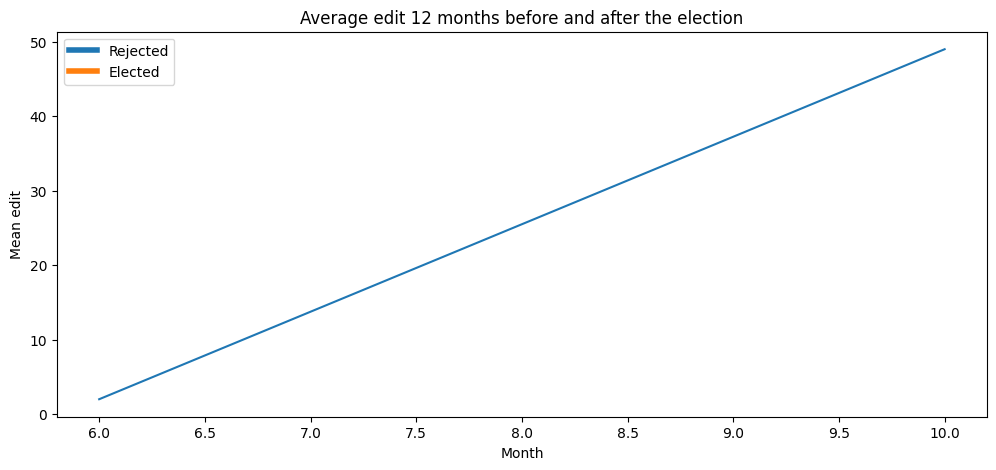

In [188]:
ax2 = plot_average_edit(result_stats_ts, 'Month', mean_col='center')
ax2.set_title('Average edit 12 months before and after the election')
plt.show()

### Study Case : 2004 - Community 2

For the community 2 in 2004, we observe that the only person who was rejected is also the person (among those in the elections) who made the most revisions. Therefore, one might wonder why they were rejected while others without revisions were accepted.

In [197]:
process_df_ts = process_elections_ts(select_study_case(2004, 2,  df_timeserie, df_dict))
df_target_rev_ts = generate_user_revision_dataset(df, process_df_ts)
result_stats_ts = revision_stat(df_target_rev_ts)

In [198]:
df_target_rev_ts

,Month_-12.0,Month_-11.0,Month_-10.0,Month_-9.0,Month_-8.0,Month_-7.0,Month_-6.0,Month_-5.0,Month_-4.0,Month_-3.0,...,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0,Result
user_name,,,,,,,,,,,,,,,,,,,,,
CryptoDerk,0.0,0.0,0.0,0.0,0.0,0.0,151.0,940.0,1.0,12.0,...,824.0,909.0,423.0,429.0,2795.0,647.0,534.0,436.0,125.0,1.0
Danny,355.0,416.0,779.0,565.0,370.0,116.0,77.0,176.0,256.0,130.0,...,1237.0,524.0,1335.0,1169.0,1468.0,1409.0,1637.0,436.0,571.0,1.0
Elf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.0,728.0,1151.0,...,512.0,512.0,712.0,605.0,383.0,607.0,546.0,342.0,869.0,1.0
GeneralPatton,0.0,0.0,0.0,0.0,493.0,339.0,1154.0,482.0,548.0,443.0,...,7.0,9.0,4.0,35.0,153.0,6.0,11.0,3.0,0.0,1.0
Grunt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,169.0,634.0,535.0,896.0,497.0,153.0,154.0,10.0,0.0,1.0
Hyacinth,78.0,1459.0,1610.0,427.0,877.0,1617.0,1216.0,1095.0,973.0,1020.0,...,1539.0,1198.0,162.0,202.0,399.0,366.0,359.0,50.0,208.0,1.0
Lachatdelarue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,318.0,...,45.0,259.0,301.0,448.0,232.0,7.0,48.0,3.0,3.0,1.0
Sam Spade,0.0,262.0,686.0,2806.0,2262.0,2928.0,2492.0,2788.0,2268.0,3872.0,...,2648.0,2082.0,3812.0,3652.0,2332.0,3340.0,2176.0,2012.0,1760.0,-1.0
UninvitedCompany,0.0,0.0,0.0,0.0,0.0,47.0,42.0,0.0,51.0,29.0,...,64.0,61.0,280.0,402.0,50.0,0.0,45.0,38.0,365.0,1.0


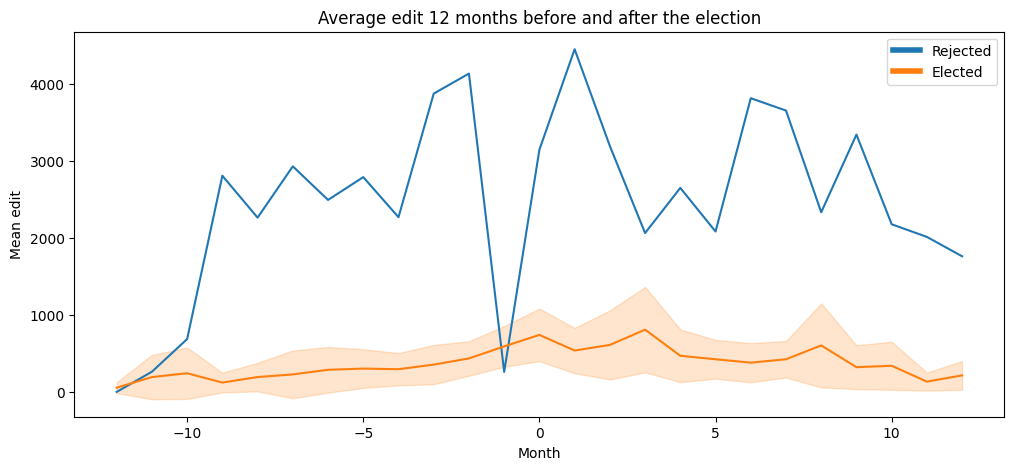

In [191]:
ax2 = plot_average_edit(result_stats_ts, 'Month', mean_col='center')
ax2.set_title('Average edit 12 months before and after the election')
plt.show()

### Study Case : 2013 - Community 0

Finally, for the third case study, community 0 in 2013, it's challenging to draw definitive conclusions based on the graph alone.

In [192]:
process_df_ts = process_elections_ts(select_study_case(2013, 0,  df_timeserie, df_dict))
df_target_rev_ts = generate_user_revision_dataset(df, process_df_ts)
result_stats_ts = revision_stat(df_target_rev_ts)

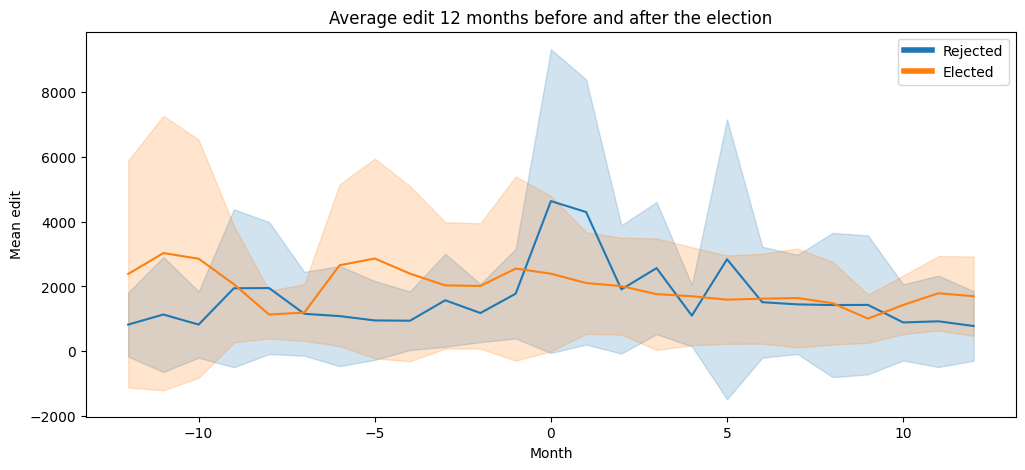

In [193]:
ax2 = plot_average_edit(result_stats_ts, 'Month', mean_col='center')
ax2.set_title('Average edit 12 months before and after the election')
plt.show()